#Introducción
### Diabetes
La diabetes es una enfermedad la cual se caracteriza principalmente por la presencia de altos niveles de azúcar en la sangre, resistencia a la insulina y una falta relativa de esta.

La diabetes mellitus tipo 2 es la más común (90%-95% de los casos). Se trata de una enfermedad con gran prevalencia mundial, la OMS estimó que en 2014 aproximadamente 422 millones de personas padecían diabetes mellitus tipo 2.

Los efectos más graves de esta enfermedad se presentan a largo plazo; Por ejemplo: múltiples complicaciones en el corazón, derrames cerebrales, insuficiencia renal, pérdida de la vista, circulación sanguínea deficiente, entre otros.

### Importancia del diagnóstico temprano de diabetes
Conocer de manera anticipada el padecimiento de esta enfermedad permite la toma de medidas preventivas en el paciente que ayuden a controlar sus niveles de glucosa en la sangre (dieta, ejercicio, hipoglucemiantes orales). Un correcto control permite a los pacientes tener una buena calidad de vida, con prácticamente ningún efecto en su salud, siempre y cuando su glucosa se mantenga en ciertos parámetros.



##Dataset
En esta sección presentaremos el conjunto de datos con el que vamos a trabajar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/diabetesxd.csv', sep = ',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,100,33.6,0.627,50,1
1,1,85,66,29,100,26.6,0.351,31,0
2,8,183,64,30,100,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.610677,72.295573,29.403646,128.497396,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.450477,12.106756,8.799436,89.445357,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,100.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,100.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Rasgos
El conjunto de datos con el que se trabaja corresponde a 8 datos de 767 de mujeres pertenecientes a la herencia de los indios Pima (subgrupo de nativos-americanos) mayores de 21 años

Text(0.5, 0, 'Blood Preasure')

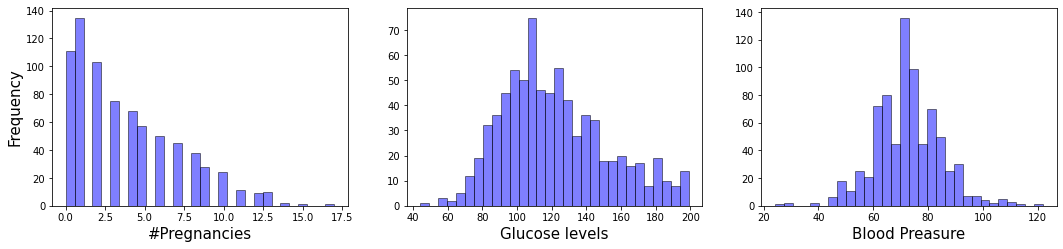

In [ ]:
plt.figure(figsize=(18,8))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)


ax1.hist(df.Pregnancies, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax1.set_xlabel('#Pregnancies', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.Glucose, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax2.set_xlabel('Glucose levels', size=15)

ax3.hist(df.BloodPressure, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Blood Preasure', size=15)

####Número de embarazos
El embarazo es un factor de riesgo en las mujeres, debido a la posibilidad de presentar diabetes gestacional, la cual afecta los niveles de glucosa de la mujer durante la gestación y eleva las probabilidades de padecer diabetes después del parto.
####Glucosa
El dato principal en el diagnóstico de diabetes, más no el único.
#### Presión Arterial
Es un parámetro importante ya que está ampliamente relacionado con otros factores causantes de la enfermedad (como la obesidad o la falta de actividad física).

Text(0.5, 0, 'Body mass index')

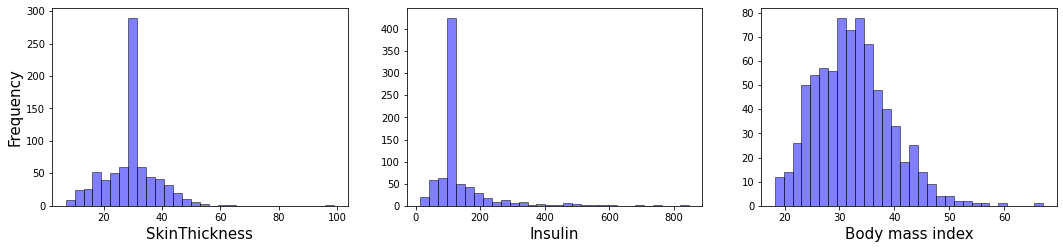

In [ ]:
plt.figure(figsize=(18,8))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)


ax1.hist(df.SkinThickness, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax1.set_xlabel('SkinThickness', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.Insulin, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax2.set_xlabel('Insulin', size=15)

ax3.hist(df.BMI, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Body mass index', size=15)

####Grosor de la piel
El grosor de la piel está determinado principalmente por el contenido de colágeno y aumenta en la diabetes mellitus insulinodependiente.
#### Insulina
Los niveles de insulina han demostrado ser una herramienta para la detección temprana de la diabetes, ya que se ha asociado valores altos con el padecimiento de la enfermedad.
#### Indice de Masa Corporal (IMC/BMI)
Un factor de riesgo importante es la obesidad, el sobrepeso y la falta de actividad física, el IMC es una manera sencilla aunque no muy precisa de clasificar a los pacientes.

Text(0.5, 0, 'Outcome')

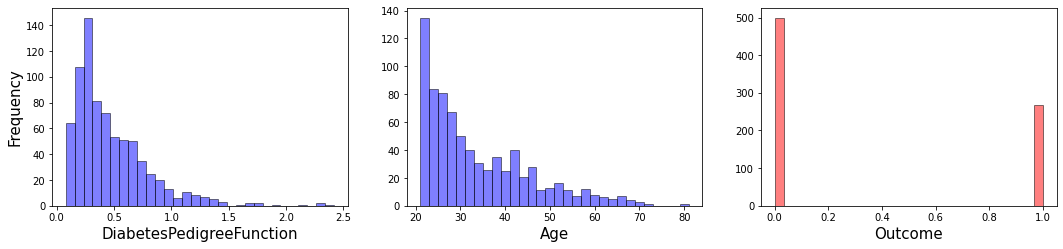

In [ ]:
plt.figure(figsize=(18,8))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)


ax1.hist(df.DiabetesPedigreeFunction, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax1.set_xlabel('DiabetesPedigreeFunction', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.Age, bins=30, color='blue',edgecolor='black', alpha=0.5)
ax2.set_xlabel('Age', size=15)

ax3.hist(df.Outcome, bins=30, color='red',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Outcome', size=15)

#### DiabetesPedigreeFunction
Función que puntúa la probabilidad de padecer diabetes en función de los antecedentes familiares. La diabetes está ampliamente relacionado a la genética por lo que es importante conocer padecimientos previos de familiares.
#### Edad
Por lo general la diabetes se presenta en personas en la edad adulta (mayores de 45 años) por lo que también la edad es un factor importante en el diagnóstico de la diabetes mellitus tipo 2.

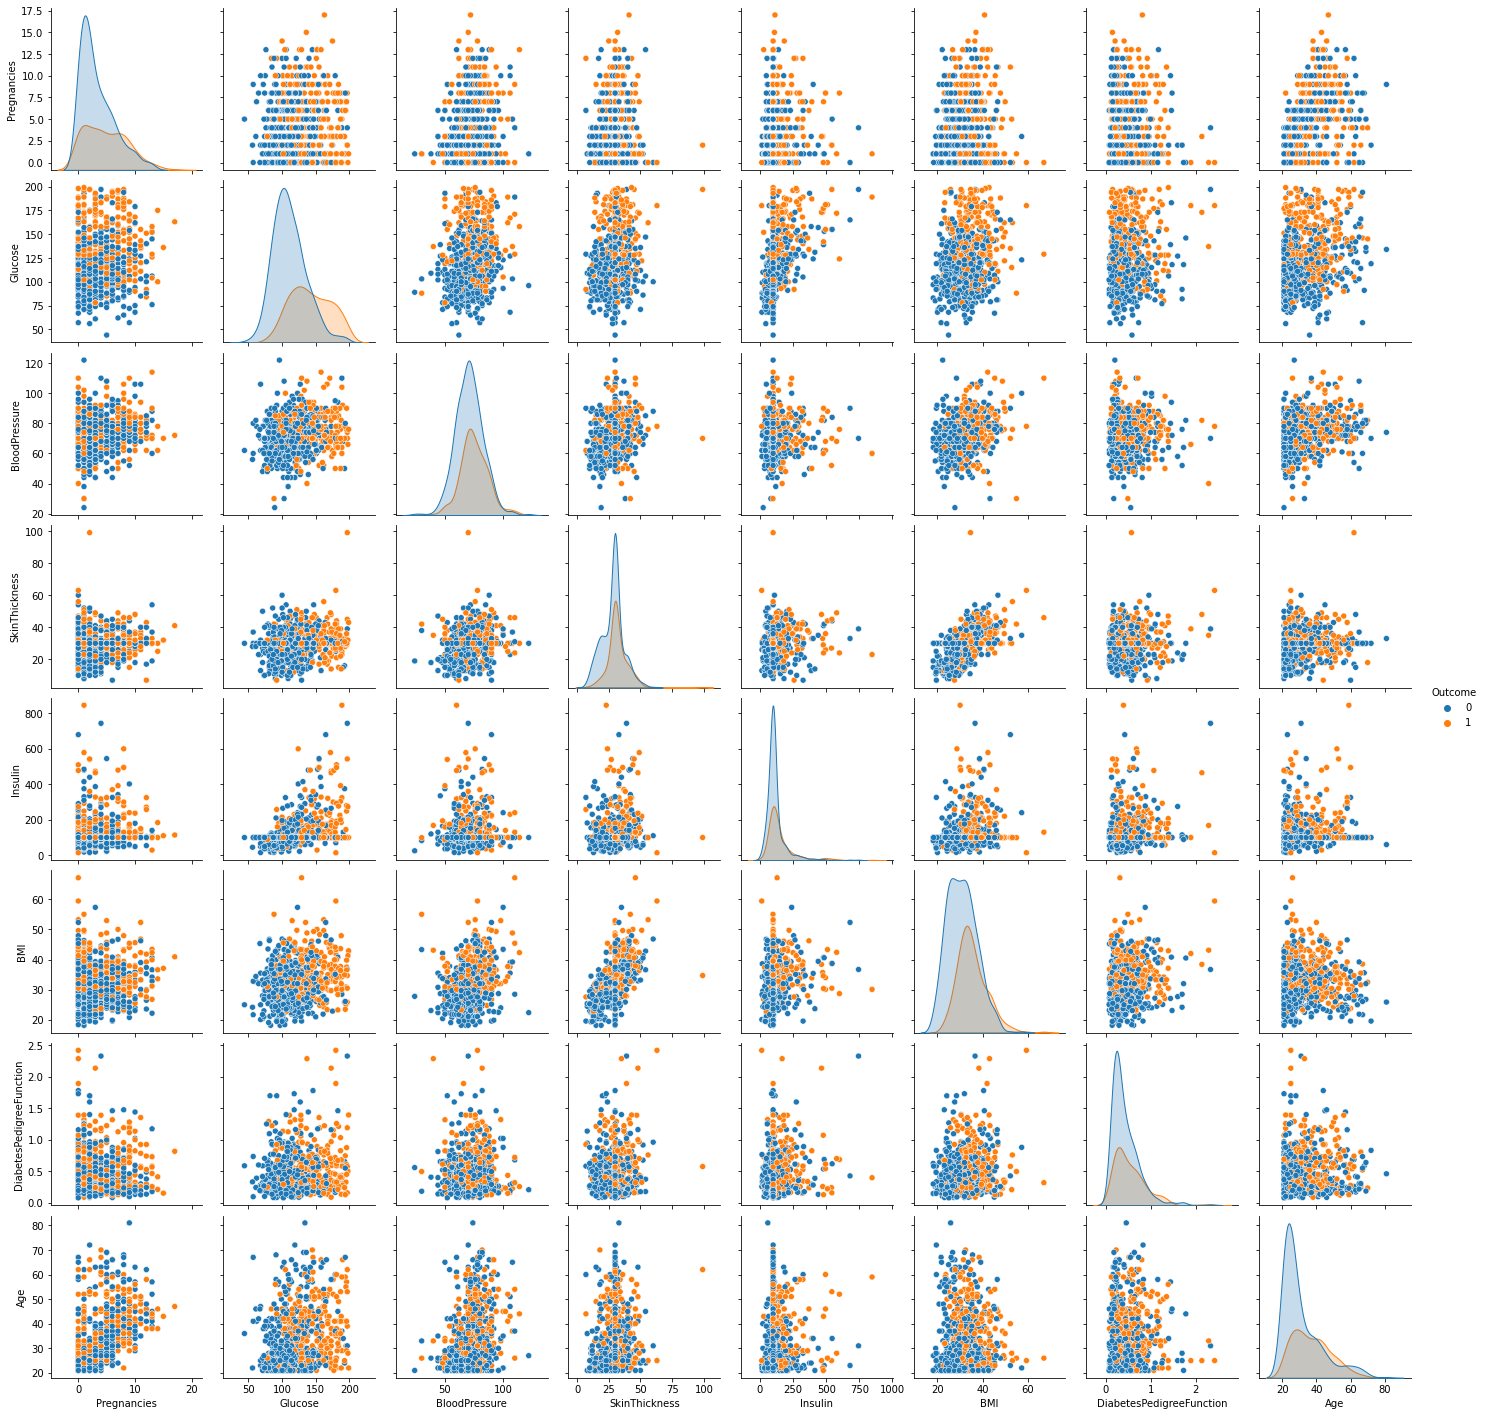

In [ ]:
import seaborn as sn
allplots = sn.pairplot(df,hue='Outcome')

In [ ]:
#Reorgamización aleatoria de los datos para evitar correlaciones
df = df.sample(frac=1)

In [ ]:
#dividimos el conjunto en datos de entrenamiento y de prueba
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [ ]:
print(df_train.shape)
print(df_test.shape)

(691, 9)
(77, 9)


In [ ]:
#Normalizamos
df_train_norm = (df_train - df_train.mean()) / df_train.std()

In [ ]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()

In [ ]:
#Separamos variables dependientes de independientes (rasgos y output)

train_x = df_train_norm.values[:,:-1]
train_y = df_train_norm.values[:,-1:]

test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

In [ ]:
print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(691, 8)
(691, 1)
(77, 8)
(77, 1)


##Implementación de la Red con Pytorch

In [ ]:
import networkx as nx #para graficar la red

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F #librería que tiene los diferentes tipos de capas para la red

import torch.optim as optim #algoritmos de otimización

print('El seed es', torch.seed())

El seed es 16324310780889117808


In [ ]:
#Separamos el conjunto de validación
val_ratio = 0.1
train_ratio = int((1.0-val_ratio)*train_x.shape[0])

X_val = train_x[train_ratio:,:]
Y_val = train_y[train_ratio:,:]

X_train = train_x[:train_ratio,:]
Y_train = train_y[:train_ratio,:]

In [ ]:
print(Y_train.shape)
print(Y_val.shape)
print(test_y.shape)

(621, 1)
(70, 1)
(77, 1)


In [ ]:
#Cambiamos sus dimensiones para hacerlos compatibles con la loss function que vamos a utilizar
train_y = np.reshape(Y_train,(621,))
val_y = np.reshape(Y_val,(70,))
test_y = np.reshape(test_y,(77,))

In [ ]:
#convertimos los arreglos de numpy a tensores
train_x= torch.Tensor(X_train)
train_y = torch.LongTensor(train_y) #permite solo operaciones con enteros (int)

val_x = torch.Tensor(X_val)
val_y = torch.LongTensor(val_y)

test_x = torch.Tensor(test_x)
test_y = torch.LongTensor(test_y) #"several loss functions like CrossEntropyLoss require that the target should be torch LongTensor"

In [ ]:
print(train_x.shape)
print(train_y.shape,"\n")

print(val_x.shape)
print(val_y.shape,"\n")

print(test_x.shape)
print(test_y.shape)

torch.Size([621, 8])
torch.Size([621]) 

torch.Size([70, 8])
torch.Size([70]) 

torch.Size([77, 8])
torch.Size([77])


In [ ]:
#Importado del notebook de la clase 5
class Network(object):

    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample

    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)


It has 5 layers,
with the following number of nodes per layer [8, 16, 16, 16, 2]


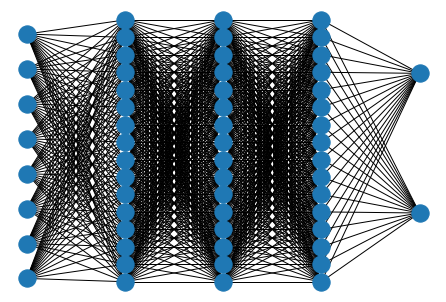

In [ ]:
layers = [8, 16, 16, 16, 2]
net = Network(layers)
net.graph(layers)

In [ ]:
class Model(nn.Module):

    def __init__(self,input_features = 8, hidden1 = 16, hidden2 = 16, hidden3 = 16,out_features=2):
        super().__init__()

        self.f_connected1 = nn.Linear(input_features,hidden1)

        self.f_connected2 = nn.Linear(hidden1,hidden2)

        self.f_connected3 = nn.Linear(hidden2,hidden3)

        self.out = nn.Linear(hidden3,out_features)

        self.Dropout = nn.Dropout(p=0.5)

    def forward(self,x):

        x = self.Dropout(torch.relu(self.f_connected1(x)))

        x = self.Dropout(torch.tanh(self.f_connected2(x)))

        x = self.Dropout(torch.sigmoid(self.f_connected3(x)))

        x = self.out(x)

        return x

In [ ]:
model=Model()

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (f_connected1): Linear(in_features=8, out_features=16, bias=True)
  (f_connected2): Linear(in_features=16, out_features=16, bias=True)
  (f_connected3): Linear(in_features=16, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=2, bias=True)
  (Dropout): Dropout(p=0.5, inplace=False)
)>

In [ ]:
Loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adamax(model.parameters(), lr= 0.0005)

In [ ]:
Train_loss = []
Val_loss = []

epoch = 1350
for i in range(epoch):
    i=i+1
    outputs = model.forward(train_x)

    loss=Loss_function(outputs,train_y)
    lossV=Loss_function(model(val_x),val_y)

    Train_loss.append(loss)
    Val_loss.append(lossV)

    if i%10==0:
        print('Epoch number {} and the Train_loss is {}'.format(i,loss.item()), 'the Val_loss is',lossV.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number 10 and the Train_loss is 0.8169475197792053 the Val_loss is 0.7876546382904053
Epoch number 20 and the Train_loss is 0.7991449236869812 the Val_loss is 0.8066035509109497
Epoch number 30 and the Train_loss is 0.7605339884757996 the Val_loss is 0.7326563596725464
Epoch number 40 and the Train_loss is 0.7627829909324646 the Val_loss is 0.7427046298980713
Epoch number 50 and the Train_loss is 0.7496894598007202 the Val_loss is 0.7040775418281555
Epoch number 60 and the Train_loss is 0.7372971177101135 the Val_loss is 0.6784741878509521
Epoch number 70 and the Train_loss is 0.7085984945297241 the Val_loss is 0.7126490473747253
Epoch number 80 and the Train_loss is 0.7090618014335632 the Val_loss is 0.6816895008087158
Epoch number 90 and the Train_loss is 0.7043585777282715 the Val_loss is 0.6664149165153503
Epoch number 100 and the Train_loss is 0.7053775787353516 the Val_loss is 0.7363032698631287
Epoch number 110 and the Train_loss is 0.6712602972984314 the Val_loss is 0.705

## Gráficas

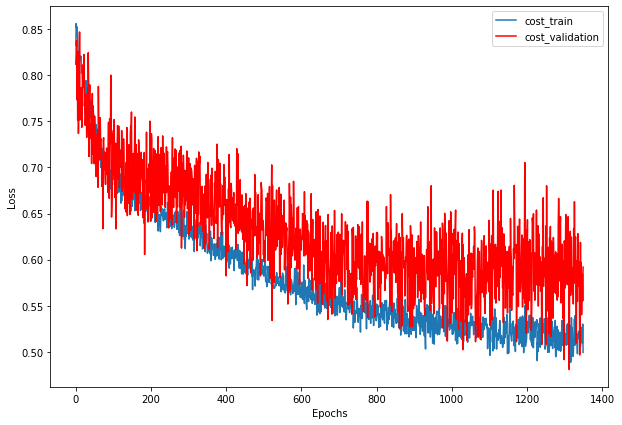

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(range(epoch),Train_loss)
plt.plot(range(epoch),Val_loss, color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['cost_train', 'cost_validation'])

In [ ]:
prediction=[]
with torch.no_grad():
    for i,dat in enumerate(test_x):
        outputs=model(dat)
        prediction.append(outputs.argmax().item())
        print(outputs.argmax().item())

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_y,prediction)

acc*100

87.01298701298701